# Study type distribution quality control

The goal of this notebook is to check the distribution of study types in the dataset.


## Data Loading

The data required for this analysis is loaded from the `computed maf` dataset.


In [ ]:
from gentropy.common.session import Session
from pyspark.sql import functions as f

from manuscript_methods import group_statistics, plot_group_statistics
from manuscript_methods.datasets import LeadVariantEffect
import plotnine as p9


In [2]:
session = Session(extended_spark_conf={"spark.driver.memory": "40G"})
lead_maf_dataset_path = "../../data/lead_variant_effect"


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/03 14:12:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
25/07/03 14:12:46 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
25/07/03 14:12:46 WARN Utils: Serv

In [3]:
session.spark


In [4]:
dataset_maf = LeadVariantEffect.from_parquet(session, lead_maf_dataset_path)
dataset = dataset_maf.df.select(
    "studyLocusId",
    "studyStatistics.studyType",
)


In [5]:
dataset.describe().show()


+-------+--------------------+---------+
|summary|        studyLocusId|studyType|
+-------+--------------------+---------+
|  count|             2833758|  2833758|
|   mean|            Infinity|     NULL|
| stddev|                 NaN|     NULL|
|    min|0000075e718162e97...| cis-pqtl|
|    max|fffffef27b8b270d5...|    tuqtl|
+-------+--------------------+---------+



## Plot the distribution of study types


+----------+-------+-----+------------------+
| studyType|  count|    %|        percentage|
+----------+-------+-----+------------------+
|      eqtl|1349478|47.62| 47.62149767199599|
|      gwas| 789453|27.86|27.858871505611983|
|     tuqtl| 384852|13.58|13.580976216035385|
|      sqtl| 223500| 7.89|  7.88705316403165|
|    sceqtl|  52744| 1.86|1.8612739690545204|
|trans-pqtl|  17678| 0.62|0.6238359097707002|
|  cis-pqtl|  16053| 0.57|0.5664915634997767|
+----------+-------+-----+------------------+



/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.5 x 3.3333333333333335 in image.
/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: plots/01.4_study_type_distribution.jpg


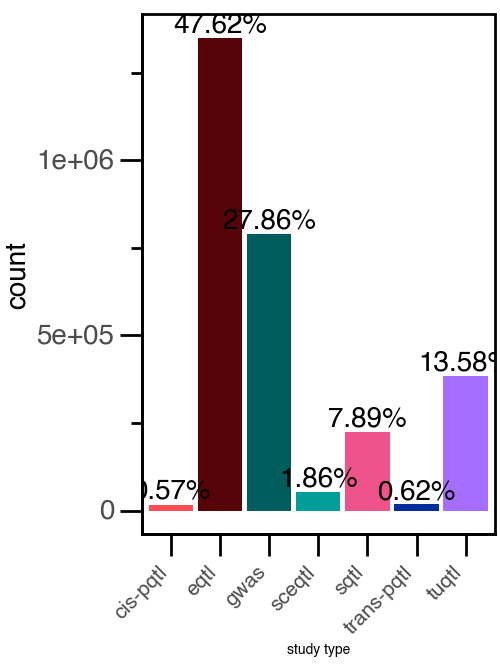

<Figure Size: (250 x 333)>

: 

In [ ]:
grouped_data = group_statistics(
    dataset_maf.df.select(
        "studyLocusId",
        "variantId",
        "locusStatistics.locusSize",
        "studyStatistics.studyType",
    ),
    f.col("studyType"),
).orderBy(f.desc("count"))
grouped_data.show()

plot = (
    plot_group_statistics(grouped_data, "studyType", "count", "%", "study type")
    + p9.theme(legend_position="none")
    + p9.geom_text(
        p9.aes(x="studyType", y="count", label="%"),
        ha="center",
        size=10,
        va="bottom",
        color="black",
        fontweight="bold",
        format_string="{}%",
    )
)
plot.save("plots/01.4_study_type_distribution.jpg", dpi=300, bbox_inches="tight")
plot
